In [1]:
# pip install ucimlrepo 
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 

In [2]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

In [3]:
# metadata 
# print(adult.metadata) 
  
# variable information 
# print(adult.variables)

# print(X.head())
# print(y)
# X

In [4]:
# Useful funcs to see info
# X.dtypes
# X['age'].describe
# X['age']
# adult.variables

In [5]:
# removes missing values
X_cleaned = X.dropna()
X_cleaned

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [6]:
# drops duplicate rows
X_cleaned = X_cleaned.drop_duplicates(ignore_index=False)
X_cleaned

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


Check for unusual values in all variables

In [7]:
# Removed unusual entries in workclass. '?' in this case
valid = ["Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov", 
         "Local-gov", "State-gov", "Without-pay", "Never-worked"]
X_cleaned = X_cleaned[X_cleaned['workclass'].isin(valid)]

In [8]:
# Check for unusual values in fnlwgt. None.
# X_cleaned.drop_duplicates('fnlwgt')


In [9]:
# Found and removed unusual entry '?' in occupation
X_cleaned.drop_duplicates('occupation')
X_cleaned = X_cleaned[X_cleaned['occupation'] != '?']

In [10]:
# Found and removed unusual entry '?' in native-country
X_cleaned.drop_duplicates('native-country')
X_cleaned = X_cleaned[X_cleaned['native-country'] != '?']

In [11]:
# Looking for unusual int values
# X_cleaned[(X_cleaned['capital-gain'] < 0)]
# X_cleaned[(X_cleaned['capital-loss'] < 0)]
# X_cleaned[(X_cleaned['hours-per-week'] < 0)]
# X_cleaned[(X_cleaned['age'] < 0)]

In [12]:
X_cleaned

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [13]:
# One-hot-encoded all categorical vars
X_dummies = pd.get_dummies(X_cleaned, columns = ['workclass', 'education', 'marital-status', 'occupation',
                             'relationship', 'race', 'native-country'])
X_dummies

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,Male,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,Male,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,Male,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,Male,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,Female,0,0,40,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,245211,13,Male,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48837,39,215419,13,Female,0,0,36,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48839,38,374983,13,Male,0,0,50,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,44,83891,13,Male,5455,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023560EF5808>,
      dtype=object)

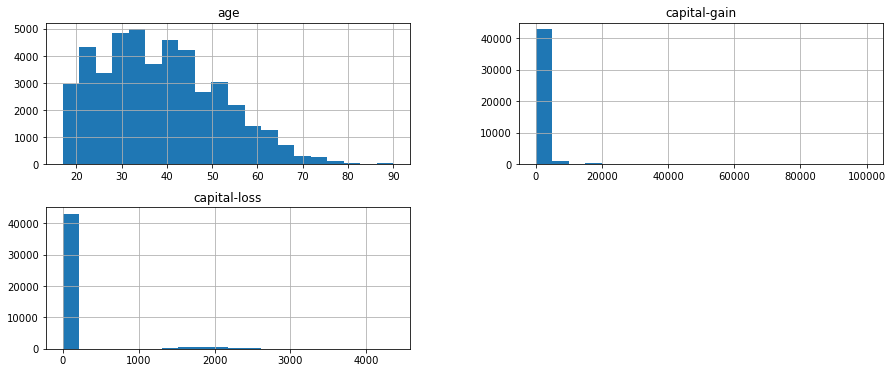

In [26]:
X_dummies.hist(column=['age', 'capital-gain', 'capital-loss'],bins=20, figsize=(15,6))

In [43]:
# Cleaned y, replaced odd entries with the correct values
y_cleaned = y.mask(y == '<=50K.', '<=50K', inplace=False)
y_cleaned = y_cleaned.mask(y_cleaned == '>50K.', '>50K', inplace=False)